In [3]:
import pandas as pd
import seaborn as sns
data=sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### The Titanic dataset contains demographic and socio-economic features of passengers along with survival outcomes. Several variables contain missing values, notably age, deck, and embarked, indicating real-world data incompleteness and motivating careful preprocessing before modeling.

In [9]:
data.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

### Missing values are not uniformly distributed across features. Variables such as deck and age show substantial missingness, suggesting potential data collection bias. These missing values must be handled carefully to avoid introducing artificial patterns during model training.

<function matplotlib.pyplot.show(close=None, block=None)>

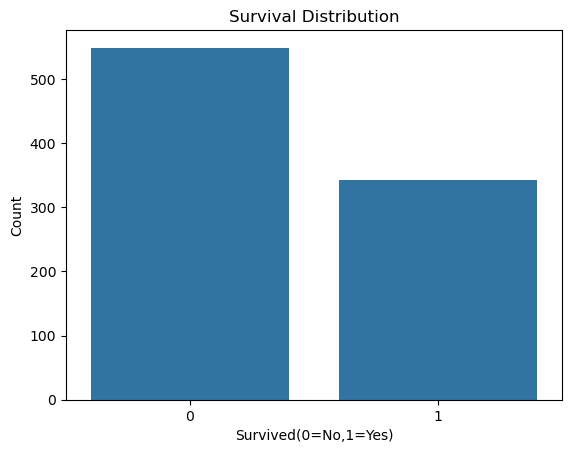

In [16]:
import matplotlib .pyplot as plt

sns.countplot(x="survived",data=data)
plt.title("Survival Distribution")
plt.xlabel("Survived(0=No,1=Yes)")
plt.ylabel("Count")
plt.show

### The dataset exhibits a class imbalance, with a higher number of non-survivors compared to survivors. This imbalance highlights the necessity of evaluation metrics beyond accuracy, such as precision, recall, and F1-score, in later modeling stages.

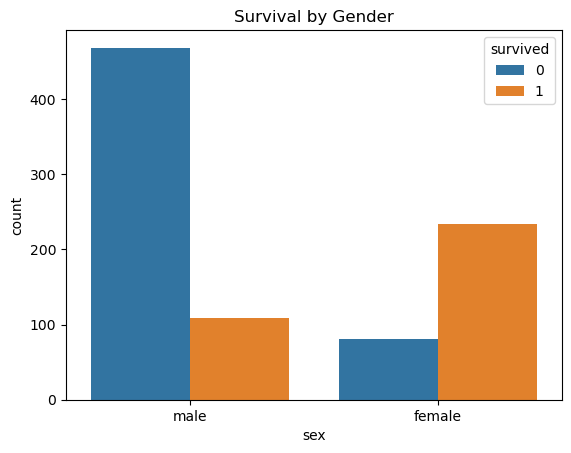

In [19]:
sns.countplot(x="sex",hue="survived",data=data)
plt.title("Survival by Gender")
plt.show()

### A strong survival disparity is observed between genders, with females exhibiting significantly higher survival rates. This reflects historical evacuation policies and introduces a dominant predictive feature, which must be interpreted cautiously to avoid misleading causal conclusions.

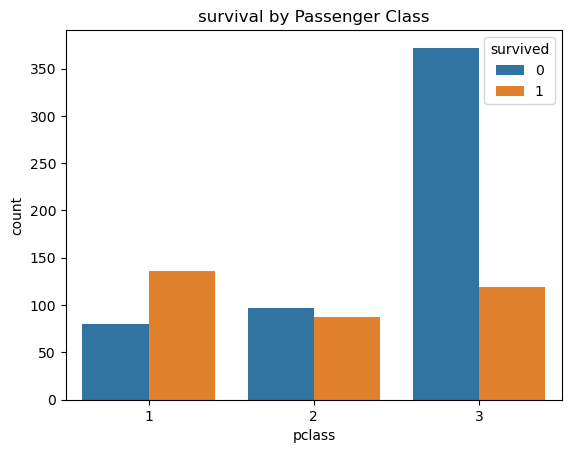

In [22]:
sns.countplot(x="pclass",hue="survived",data=data)
plt.title("survival by Passenger Class")
plt.show()

### Survival probability increases markedly for passengers in higher classes. This indicates a socio-economic bias embedded within the dataset, where access to safety resources influenced survival outcomes.

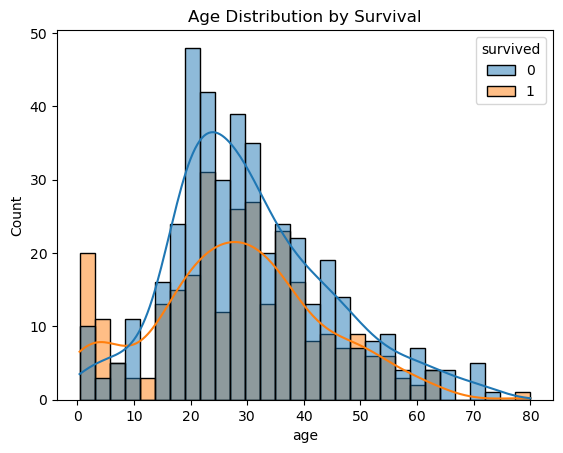

In [27]:
sns.histplot(data=data,x="age",hue="survived", bins=30,kde=True)
plt.title("Age Distribution by Survival")
plt.show()

### Younger passengers exhibit relatively higher survival probabilities, while older age groups show increased mortality. However, missing age values may distort this pattern, reinforcing the need for robust imputation strategies.